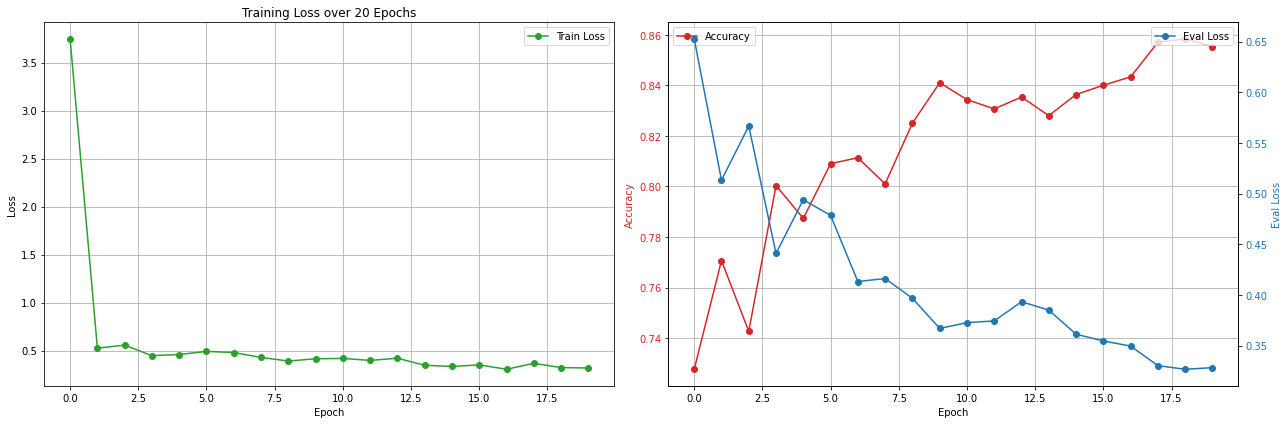

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os

# load the datas
train_data_path = "ViT-base-train_loss.csv"
eval_data_path = "ViT-base-eval_loss_acc.csv"
train_data = np.loadtxt(train_data_path, delimiter=",", skiprows=1)
eval_data = np.loadtxt(eval_data_path, delimiter=",", skiprows=1)

# Redefine epoch range from 0 to 19 for both datasets
num_epochs = 20
train_epochs_new = np.linspace(0, train_data.shape[0]-1, num_epochs, dtype=int)
eval_epochs_new = np.linspace(0, eval_data.shape[0]-1, num_epochs, dtype=int)

train_selected_new = train_data[train_epochs_new, :]
eval_selected_new = eval_data[eval_epochs_new, :]

# Create a combined plot for both training loss and evaluation metrics, but arranged horizontally
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the training loss on the first subplot
ax1.plot(np.arange(num_epochs), train_selected_new[:, 1], label="Train Loss", marker='o', color='tab:green')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Training Loss over 20 Epochs")
ax1.grid(True)
ax1.legend(loc='upper right')

# Plotting the evaluation loss and accuracy on the second subplot
color = 'tab:red'
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(np.arange(num_epochs), eval_selected_new[:, 1], color=color, marker='o', label="Accuracy")
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True, which='both')
ax2.legend(loc='upper left')

# Instantiate a second y-axis for accuracy on the second subplot
ax3 = ax2.twinx()
color = 'tab:blue'
ax3.set_ylabel('Eval Loss', color=color)  
ax3.plot(np.arange(num_epochs), eval_selected_new[:, 2], color=color, marker='o', label="Eval Loss")
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Adjust layout to make room for the plot
ax3.legend(loc='upper right')

plt.show()